<a href="https://colab.research.google.com/github/mithrani07/landingpage-SkillkraftTechnology-web-development-internship-task1/blob/main/project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
col_names = [
    "age", "workclass", "fnlwgt", "education", "education-num",
    "marital-status", "occupation", "relationship", "race", "sex",
    "capital-gain", "capital-loss", "hours-per-week", "native-country", "income"
]


In [3]:
import pandas as pd

# Load adult.data (no header)
train_df = pd.read_csv('/content/adult (1).csv', header=None, names=col_names, sep=',', skipinitialspace=True)

# Load adult.test (skip first row, same columns)
test_df = pd.read_csv('/content/adult (2).csv', header=0, names=col_names, sep=',', skipinitialspace=True)

# Remove trailing '.' from labels in test set
test_df['income'] = test_df['income'].str.strip().str.replace('.', '', regex=False)

# Combine them
data = pd.concat([train_df, test_df], ignore_index=True)


Accuracy: 0.8290510799467704
Confusion Matrix:
 [[6760  671]
 [ 999 1339]]


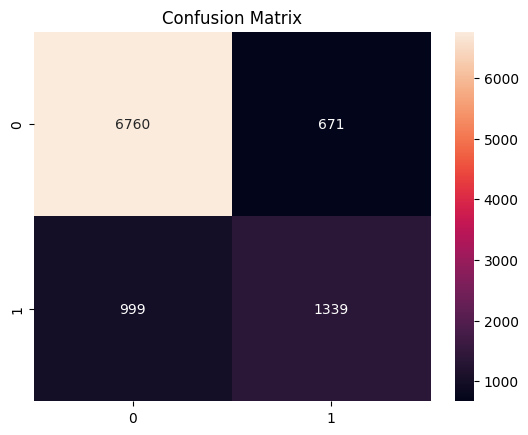

In [4]:
# STEP 1: Install and import (if needed)
# !pip install matplotlib seaborn scikit-learn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# STEP 2: LOAD & COMBINE DATA
col_names = [
    "age", "workclass", "fnlwgt", "education", "education-num",
    "marital-status", "occupation", "relationship", "race", "sex",
    "capital-gain", "capital-loss", "hours-per-week", "native-country", "income"
]
train = pd.read_csv('/content/adult (1).csv', header=None, names=col_names, sep=',', skipinitialspace=True)
test = pd.read_csv('/content/adult (2).csv', header=0, names=col_names, sep=',', skipinitialspace=True)
test['income'] = test['income'].str.strip().str.replace('.', '', regex=False)
data = pd.concat([train, test], ignore_index=True)

# STEP 3: PREPROCESS
# Replace '?' with 'Others'
data.replace('?', 'Others', inplace=True)

# OPTIONAL: Drop columns (like 'education') if redundant
if 'education' in data.columns and 'education-num' in data.columns:
    data = data.drop(['education'], axis=1)

# Encode categorical columns
for col in data.select_dtypes(include='object').columns:
    if col != 'income':
        data[col] = LabelEncoder().fit_transform(data[col])

# STEP 4: FORMAT TARGET
data['income'] = data['income'].str.strip()
data['income'] = data['income'].map({'>50K': 1, '<=50K': 0})

# Remove rows with missing labels, if any
data = data.dropna(subset=['income'])
data['income'] = data['income'].astype(int)

# STEP 5: FEATURE SPLIT & SCALING
X = data.drop('income', axis=1)
Y = data['income']
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# STEP 6: TRAIN/TEST SPLIT
X_train, X_test, Y_train, Y_test = train_test_split(
    X_scaled, Y, test_size=0.2, random_state=42, stratify=Y
)

# STEP 7: BUILD & TRAIN MODEL
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, Y_train)

# STEP 8: EVALUATE
predictions = knn.predict(X_test)
print('Accuracy:', accuracy_score(Y_test, predictions))
print('Confusion Matrix:\n', confusion_matrix(Y_test, predictions))
sns.heatmap(confusion_matrix(Y_test, predictions), annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.show()
